6/23/2022

Test simulation on CaOH bending mode microwave spectrum.

In [1]:
using Revise

In [2]:
# using MKL
using JuliaSpectra
using BenchmarkTools
using Parameters
using Plots
using LinearAlgebra
BLAS.get_config()

┌ Info: Precompiling JuliaSpectra [3ef6d832-bae6-4172-b279-153036e5bc42]
└ @ Base loading.jl:1423
┌ Warning: Replacing docs for `JuliaSpectra.X :: Union{}` in module `JuliaSpectra`
└ @ Base.Docs docs/Docs.jl:240
┌ Warning: Replacing docs for `JuliaSpectra.X :: Union{}` in module `JuliaSpectra`
└ @ Base.Docs docs/Docs.jl:240
┌ Warning: Replacing docs for `JuliaSpectra.X :: Union{}` in module `JuliaSpectra`
└ @ Base.Docs docs/Docs.jl:240
┌ Warning: Replacing docs for `JuliaSpectra.X :: Union{}` in module `JuliaSpectra`
└ @ Base.Docs docs/Docs.jl:240
┌ Warning: Replacing docs for `JuliaSpectra.X :: Union{}` in module `JuliaSpectra`
└ @ Base.Docs docs/Docs.jl:240


LinearAlgebra.BLAS.LBTConfig
Libraries: 
└ [ILP64] libopenblas64_.0.3.13.dylib

In [9]:
const sol = 29979.2458 # converts cm-1 to MHz.
const h = 6.626e-34
const ħ = h / 2π
const μB = 4.66989733e-5 * sol # in MHz/Gauss.
;

In [97]:
@unpack B, γ, bF, c, qv = MolParams["CaOH"]["X010"]
const BX = B*sol
const γX = γ*sol
const bFX = bF*sol
const cX = c*sol
const qvX = qv*sol
;

In [98]:
# Build N=1
boundsN1 = (l=[-1,1], I=1/2, N=1, Λ=0, S = 1/2)
basisN1 = enumerate_states(LinearCaseB_Bend_Field, boundsN1)

boundsN2 = (l=[-1,1], I=1/2, N=2, Λ=0, S = 1/2)
basisN2 = enumerate_states(LinearCaseB_Bend_Field, boundsN2)
;


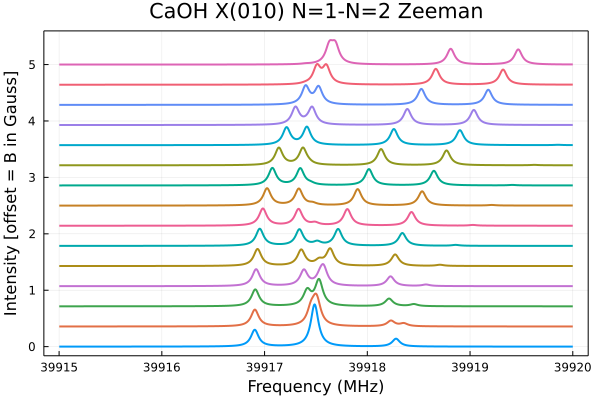

In [211]:

N1 = makevibronicmanifold(basisN1, [(BX, Rotation),(γX,SpinRotation),(bFX+cX/3, HyperfineFermi),(cX,Hyperfine_Dipolar_c),(qvX,lDoubling),(0.0,μB*2*Zeeman)])
N2 = makevibronicmanifold(basisN2, [(BX, Rotation),(γX,SpinRotation),(bFX+cX/3, HyperfineFermi),(cX,Hyperfine_Dipolar_c),(qvX,lDoubling),(0.0,μB*2*Zeeman)])

TDMvibro = makeTDMvibronicmanifolds(N1,N2)

xplot = []
yplot = []
for (i,Bfield)  in enumerate(range(0.0, stop=5.0, length=15))
    N1.prefactors[6] = Bfield
    N2.prefactors[6] = Bfield 
    xdict, xccs = makeblockedvibronicmanifold(N1)
    adict, accs = makeblockedvibronicmanifold(N2)
    blockTDMDict = makeblockedTDMDict(xccs,accs,TDMvibro)
    lout2 = makeLineList(xdict, adict, blockTDMDict, 0; TK=500)
    x,y=plotLineList(lout2, 39915, 39920, gamma=0.09, nstep=3000)
    push!(xplot,x)
    push!(yplot,y/4 .+Bfield)
end
plot(reduce(hcat,xplot),reduce(hcat,yplot),lw=2)
xlabel!("Frequency (MHz)")
ylabel!("Intensity [offset = B in Gauss]")
plot!(legend=false, title="CaOH X(010) N=1-N=2 Zeeman", frame=:box)

In [ ]:
# Next up, make the plot interactive and indicate which eigenstates correspond to each transition.